## Spotify Top 50 Song Data Analysis 

I have always been an avid lover of music and with my new passion for data analysis I am going to try to combine both with this spotify data set. This is a [kaggle dataset](https://www.kaggle.com/leonardopena/top50spotify2019) from 2019 which I am going to use to see if there are any comparisons between genres and or music compositons that make something a hit song. 


In [ ]:
# Importing all of the libraries that I might need 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

In [ ]:
# Reminder if you are using google colab like me to add the file in the content folder
spotify = pd.read_csv('top50.csv', encoding='ISO-8859-1')
# It shows the first 10 rows of the data set
spotify.head(10)
# I want to rename the first column to something like Official Ranking
spotify = spotify.rename(columns={'Unnamed: 0':'Offical Ranking'})
spotify.head(10)

,Offical Ranking,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [ ]:
# Want to get a look at parameters of the dataset including non-nulls, memory usage, data types in the set 
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Offical Ranking   50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [ ]:
# describes the tendencies that are seen in the dataset and then transposes them
spotify.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Offical Ranking,50.0,25.50,14.577380,1.0,13.25,25.5,37.75,50.0
Beats.Per.Minute,50.0,120.06,30.898392,85.0,96.00,104.5,137.50,190.0
Energy,50.0,64.06,14.231913,32.0,55.25,66.5,74.75,88.0
Danceability,50.0,71.38,11.929880,29.0,67.00,73.5,79.75,90.0
Loudness..dB..,50.0,-5.66,2.056448,-11.0,-6.75,-6.0,-4.00,-2.0
Liveness,50.0,14.66,11.118306,5.0,8.00,11.0,15.75,58.0
Valence.,50.0,54.60,22.336024,10.0,38.25,55.5,69.50,95.0
Length.,50.0,200.96,39.143879,115.0,176.75,198.0,217.50,309.0
Acousticness..,50.0,22.16,18.995553,1.0,8.25,15.0,33.75,75.0
Speechiness.,50.0,12.48,11.161596,3.0,5.00,7.0,15.00,46.0


In [ ]:
spotify.columns

Index(['Offical Ranking', 'Track.Name', 'Artist.Name', 'Genre',
       'Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..',
       'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.',
       'Popularity'],
      dtype='object')

In [ ]:
print(spotify.shape)

(50, 14)


In [ ]:
# I want to see if there is some correlation with danceability, and popularity
genre = spotify.groupby("Genre").sum()
genre.head(10)

,Offical Ranking,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Genre,,,,,,,,,,,
atl hip hop,34,98,59,80,-7,13,18,200,2,15,89
australian pop,27,98,59,82,-6,18,54,210,69,10,83
big room,36,114,72,66,-7,14,32,164,18,6,89
boy band,39,138,73,84,-5,11,95,181,4,6,80
brostep,94,188,141,135,-5,75,111,396,26,10,176
canadian hip hop,62,327,135,240,-19,45,100,579,65,16,269
canadian pop,27,241,137,145,-10,21,162,382,53,9,149
country rap,31,290,121,158,-12,23,112,272,39,18,178
dance pop,223,895,479,562,-49,124,367,1621,216,122,686


## Notes 

From this chart above we can see that there is a little bit of correlation between the danceability and popularity of a song. Meaning that if the song has a high danceability the song is more likely to become a popular song. To make sure I am going to do a joinplot to get a closer look at the connection between danceability and popularity

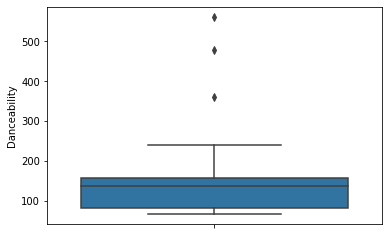

In [ ]:
sns.boxplot(y = genre["Danceability"])
plt.show()

When grouping by genre seems that there are multiple outliers in the genre categories which means that my initial thought of a correlation might be skewed. 

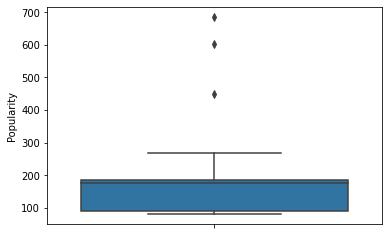

In [ ]:
sns.boxplot(y = genre["Popularity"])
plt.show()

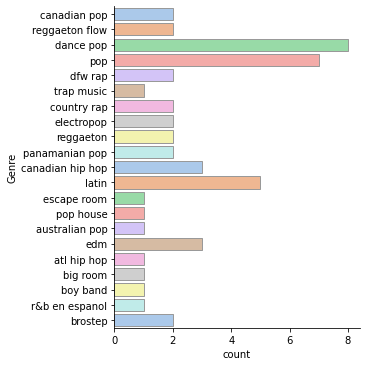

In [ ]:
#Catplot
#This shows a distribution count of each genre that is inside the top 50 spotify 
sns.catplot(y = "Genre", kind = "count",
            palette = "pastel", edgecolor = ".6",
            data = spotify)
plt.show()

<Figure size 864x864 with 0 Axes>

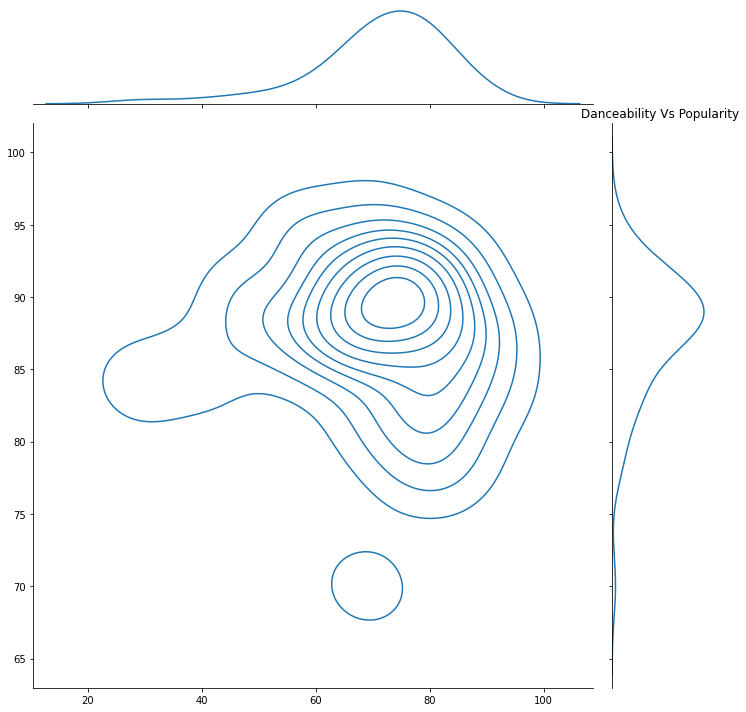

In [ ]:
plt.figure(figsize=(12,12))
sns.jointplot(x=spotify["Danceability"].values, y=spotify["Popularity"].values, height=10, kind='kde',)
plt.ylabel("Popularity", fontsize=12)
plt.xlabel("Danceability", fontsize=12)
plt.title("Danceability Vs Popularity", fontsize=12)
plt.show();

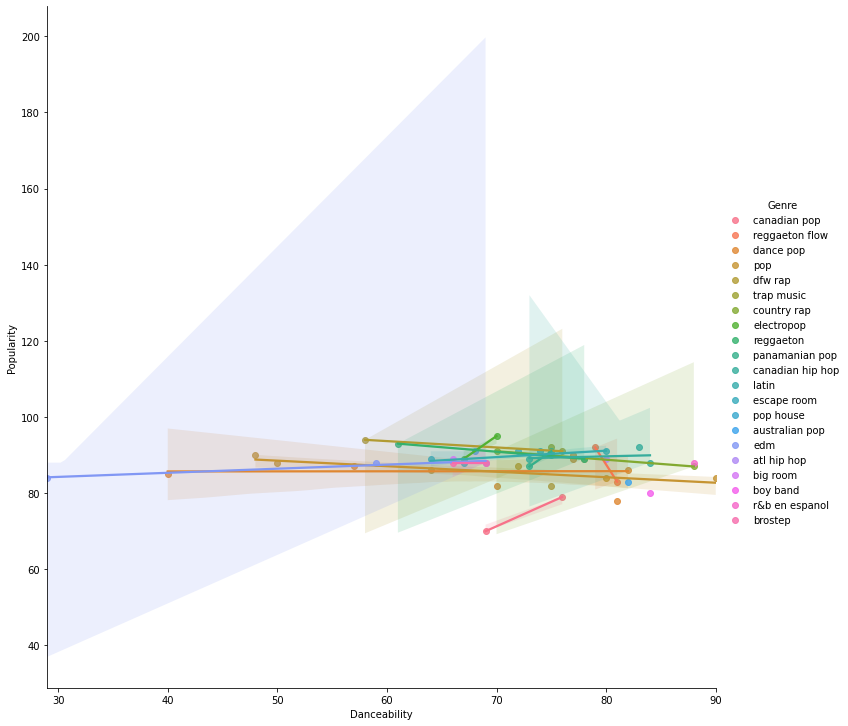

In [ ]:
sns.lmplot(x="Danceability",y="Popularity",data=spotify,height=10,hue="Genre")
plt.show()